## === Loading extension

- <span style="color:red"><b>TODO</b> - Hook for automatic loading if env.var INTELL_GENAI_ENABLE_JUPYTER_AI=true)</span>.

In [2]:
%load_ext jupyter_ai_magics

In [3]:
%ai --help

Usage: %%ai [OPTIONS] MODEL_ID

  Invokes a language model identified by MODEL_ID, with the prompt being
  contained in all lines after the first. Both local model IDs and global
  model IDs (with the provider ID explicitly prefixed, followed by a colon)
  are accepted.

  To view available language models, please run `%ai list`.

Options:
  -f, --format [code|html|image|json|markdown|math|md|text]
                                  IPython display to use when rendering
                                  output. [default="markdown"]
  -n, --region-name TEXT          AWS region name, e.g. 'us-east-1'. Required
                                  for SageMaker provider; does nothing with
                                  other providers.
  -q, --request-schema TEXT       The JSON object the endpoint expects, with
                                  the prompt being substituted into any value
                                  that matches the string literal '<prompt>'.
                         

## === Listing available providers & custom commands/chains

In [4]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `stratio_genai_provider` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Stratio GenAI Service: acts as a gateway to final LLM provider |
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `ai21:j1-large`, `ai21:j1-grande`, `ai21:j1-jumbo`, `ai21:j1-grande-instruct`, `ai21:j2-large`, `ai21:j2-grande`, `ai21:j2-jumbo`, `ai21:j2-grande-instruct`, `ai21:j2-jumbo-instruct` |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | `bedrock:amazon.titan-text-express-v1`, `bedrock:ai21.j2-ultra-v1`, `bedrock:ai21.j2-mid-v1`, `bedrock:cohere.command-light-text-v14`, `bedrock:cohere.command-text-v14`, `bedrock:meta.llama2-13b-chat-v1`, `bedrock:meta.llama2-70b-chat-v1` |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | `bedrock-chat:anthropic.claude-v1`, `bedrock-chat:anthropic.claude-v2`, `bedrock-chat:anthropic.claude-v2:1`, `bedrock-chat:anthropic.claude-instant-v1` |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `anthropic:claude-v1`, `anthropic:claude-v1.0`, `anthropic:claude-v1.2`, `anthropic:claude-2`, `anthropic:claude-2.0`, `anthropic:claude-instant-v1`, `anthropic:claude-instant-v1.0`, `anthropic:claude-instant-v1.2` |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `anthropic-chat:claude-v1`, `anthropic-chat:claude-v1.0`, `anthropic-chat:claude-v1.2`, `anthropic-chat:claude-2`, `anthropic-chat:claude-2.0`, `anthropic-chat:claude-instant-v1`, `anthropic-chat:claude-instant-v1.0`, `anthropic-chat:claude-instant-v1.2` |
| `azure-chat-openai` | `OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `cohere:command`, `cohere:command-nightly`, `cohere:command-light`, `cohere:command-light-nightly` |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | `gpt4all:ggml-gpt4all-j-v1.2-jazzy`, `gpt4all:ggml-gpt4all-j-v1.3-groovy`, `gpt4all:ggml-gpt4all-l13b-snoozy`, `gpt4all:mistral-7b-openorca.Q4_0`, `gpt4all:mistral-7b-instruct-v0.1.Q4_0`, `gpt4all:gpt4all-falcon-q4_0`, `gpt4all:wizardlm-13b-v1.2.Q4_0`, `gpt4all:nous-hermes-llama2-13b.Q4_0`, `gpt4all:gpt4all-13b-snoozy-q4_0`, `gpt4all:mpt-7b-chat-merges-q4_0`, `gpt4all:orca-mini-3b-gguf2-q4_0`, `gpt4all:starcoder-q4_0`, `gpt4all:rift-coder-v0-7b-q4_0`, `gpt4all:em_german_mistral_v01.Q4_0` |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `openai:text-davinci-003`, `openai:text-davinci-002`, `openai:text-curie-001`, `openai:text-babbage-001`, `openai:text-ada-001`, `openai:davinci`, `openai:curie`, `openai:babbage`, `openai:ada` |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `openai-chat:gpt-3.5-turbo`, `openai-chat:gpt-3.5-turbo-16k`, `openai-chat:gpt-3.5-turbo-0301`, `openai-chat:gpt-3.5-turbo-0613`, `openai-chat:gpt-3.5-turbo-16k-0613`, `openai-chat:gpt-4`, `openai-chat:gpt-4-0314`, `openai-chat:gpt-4-0613`, `openai-chat:gpt-4-32k`, `openai-chat:gpt-4-32k-0314`, `openai-chat:gpt-4-32k-0613`, `openai-chat:gpt-4-1106-preview` |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | `qianfan:ERNIE-Bot`, `qianfan:ERNIE-Bot-4` |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deployment.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:text-davinci-003` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |


## === Interacting with providers

- <span style="color:red"><b>BAD</b> - MODEL_ID is needed; total isolation with chat interface</span>.
- <span style="color:red"><b>BAD</b> - Auth. with provider need to live in Analytic</span>.

In [6]:
%%ai

¿quien eres?

Cannot determine model provider from model ID ``.

To see a list of models you can use, run `%ai list`

If you were trying to run a command, run `%ai help` to see a list of commands.

In [8]:
%%ai openai-chat:gpt-3.5-turbo

¿quien eres?

OSError: Authentication environment variable OPENAI_API_KEY is not set.
An authentication token is required to use models from the OpenAI provider.
Please specify it via `%env OPENAI_API_KEY=token`. 

## === Interacting with Stratio GenAI ~ Proxy to final provider

- Parecido a la solución que implementa MLflow en su [MLflow Deployments Server](https://www.mlflow.org/docs/latest/llms/index.html#id1)

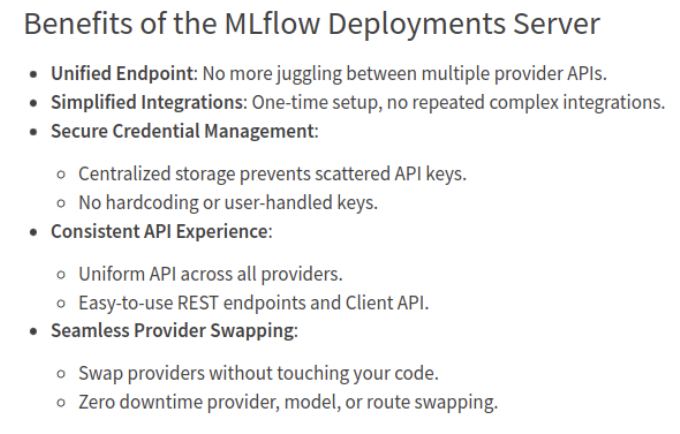

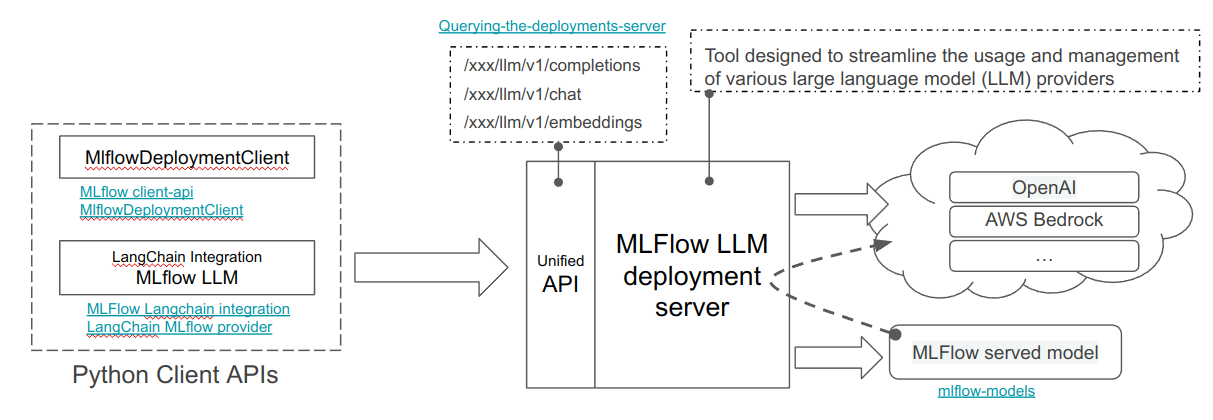

#### Code generation

In [9]:
%%ai stratio_genai_provider:* -f code

escribe una función que devuelva la suma de dos números en python

In [ ]:
def suma(a, b):
    return a + b

#### Formatted text generation

In [10]:
%%ai stratio_genai_provider:* -f html

Escribe un Html con titulo y párrafos explicando los diferentes tipos de datos primarios de Python

In [11]:
%%ai stratio_genai_provider:* -f markdown

Escribe un markdown con titulo y párrafos explicando los diferentes tipos de datos primarios de Python

# Tipos de datos primarios de Python

Python es un lenguaje de programación versátil que ofrece diferentes tipos de datos primarios para almacenar y manipular información. A continuación, se presentan los principales tipos de datos primarios en Python:

## Números enteros (int)

Los números enteros son valores numéricos sin parte decimal. En Python, se pueden representar mediante el tipo de dato `int`. Por ejemplo:

```python
x = 10
```

## Números de punto flotante (float)

Los números de punto flotante son valores numéricos que incluyen una parte decimal. En Python, se pueden representar mediante el tipo de dato `float`. Por ejemplo:

```python
y = 3.14
```

## Cadenas de texto (str)

Las cadenas de texto son secuencias de caracteres. En Python, se pueden representar mediante el tipo de dato `str`. Para definir una cadena de texto, se pueden utilizar comillas simples o dobles. Por ejemplo:

```python
nombre = 'Juan'
mensaje = "Hola, ¿cómo estás?"
```

## Booleanos (bool)

Los booleanos son valores que representan la verdad o la falsedad. En Python, se pueden representar mediante el tipo de dato `bool`, que solo puede tener dos posibles valores: `True` o `False`. Por ejemplo:

```python
es_mayor_de_edad = True
esta_lluvioso = False
```

## Listas (list)

Las listas son colecciones ordenadas y modificables de elementos. En Python, se pueden representar mediante el tipo de dato `list`. Los elementos de una lista pueden ser de diferentes tipos de datos. Por ejemplo:

```python
numeros = [1, 2, 3, 4, 5]
nombres = ['Ana', 'Juan', 'María']
```

## Tuplas (tuple)

Las tuplas son colecciones ordenadas e inmutables de elementos. En Python, se pueden representar mediante el tipo de dato `tuple`. Los elementos de una tupla pueden ser de diferentes tipos de datos. Por ejemplo:

```python
coordenadas = (3, 5)
colores = ('rojo', 'verde', 'azul')
```

## Conjuntos (set)

Los conjuntos son colecciones no ordenadas y sin elementos duplicados. En Python, se pueden representar mediante el tipo de dato `set`. Por ejemplo:

```python
frutas = {'manzana', 'naranja', 'plátano'}
```

## Diccionarios (dict)

Los diccionarios son colecciones de pares clave-valor, donde cada clave se asocia a un valor. En Python, se pueden representar mediante el tipo de dato `dict`. Por ejemplo:

```python
persona = {'nombre': 'Juan', 'edad': 25, 'ciudad': 'Madrid'}
```

Estos son algunos de los tipos de datos primarios más utilizados en Python. Cada uno de ellos tiene sus propias características y funciones específicas, lo que permite a los programadores manejar diferentes tipos de información de manera eficiente.

In [16]:
%%ai stratio_genai_provider:* -f math

Escribeme las ecuaciones de Maxwell en LaTeX

<IPython.core.display.Math object>

## === Registering & executing custom chains in runtime

In [12]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI

# TODO ==> Custom LangChain BaseChatModel = StratioChatService(BaseChatModel) ~ client to Proxy chain 
from intell_genai.jupyter_ai.stratio_genai_provider.llm import StratioChatService

llm = StratioChatService(temperature=0.9)

prompt = PromptTemplate(
    input_variables=["product"],
    template="What is a good name for a company that makes {product}?",
)

chain = LLMChain(llm=llm, prompt=prompt)

In [13]:
%ai register companyname chain

Registered new alias `companyname`

In [14]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `stratio_genai_provider` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Stratio GenAI Service: acts as a gateway to final LLM provider |
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `ai21:j1-large`, `ai21:j1-grande`, `ai21:j1-jumbo`, `ai21:j1-grande-instruct`, `ai21:j2-large`, `ai21:j2-grande`, `ai21:j2-jumbo`, `ai21:j2-grande-instruct`, `ai21:j2-jumbo-instruct` |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | `bedrock:amazon.titan-text-express-v1`, `bedrock:ai21.j2-ultra-v1`, `bedrock:ai21.j2-mid-v1`, `bedrock:cohere.command-light-text-v14`, `bedrock:cohere.command-text-v14`, `bedrock:meta.llama2-13b-chat-v1`, `bedrock:meta.llama2-70b-chat-v1` |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | `bedrock-chat:anthropic.claude-v1`, `bedrock-chat:anthropic.claude-v2`, `bedrock-chat:anthropic.claude-v2:1`, `bedrock-chat:anthropic.claude-instant-v1` |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `anthropic:claude-v1`, `anthropic:claude-v1.0`, `anthropic:claude-v1.2`, `anthropic:claude-2`, `anthropic:claude-2.0`, `anthropic:claude-instant-v1`, `anthropic:claude-instant-v1.0`, `anthropic:claude-instant-v1.2` |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `anthropic-chat:claude-v1`, `anthropic-chat:claude-v1.0`, `anthropic-chat:claude-v1.2`, `anthropic-chat:claude-2`, `anthropic-chat:claude-2.0`, `anthropic-chat:claude-instant-v1`, `anthropic-chat:claude-instant-v1.0`, `anthropic-chat:claude-instant-v1.2` |
| `azure-chat-openai` | `OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `cohere:command`, `cohere:command-nightly`, `cohere:command-light`, `cohere:command-light-nightly` |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | `gpt4all:ggml-gpt4all-j-v1.2-jazzy`, `gpt4all:ggml-gpt4all-j-v1.3-groovy`, `gpt4all:ggml-gpt4all-l13b-snoozy`, `gpt4all:mistral-7b-openorca.Q4_0`, `gpt4all:mistral-7b-instruct-v0.1.Q4_0`, `gpt4all:gpt4all-falcon-q4_0`, `gpt4all:wizardlm-13b-v1.2.Q4_0`, `gpt4all:nous-hermes-llama2-13b.Q4_0`, `gpt4all:gpt4all-13b-snoozy-q4_0`, `gpt4all:mpt-7b-chat-merges-q4_0`, `gpt4all:orca-mini-3b-gguf2-q4_0`, `gpt4all:starcoder-q4_0`, `gpt4all:rift-coder-v0-7b-q4_0`, `gpt4all:em_german_mistral_v01.Q4_0` |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `openai:text-davinci-003`, `openai:text-davinci-002`, `openai:text-curie-001`, `openai:text-babbage-001`, `openai:text-ada-001`, `openai:davinci`, `openai:curie`, `openai:babbage`, `openai:ada` |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `openai-chat:gpt-3.5-turbo`, `openai-chat:gpt-3.5-turbo-16k`, `openai-chat:gpt-3.5-turbo-0301`, `openai-chat:gpt-3.5-turbo-0613`, `openai-chat:gpt-3.5-turbo-16k-0613`, `openai-chat:gpt-4`, `openai-chat:gpt-4-0314`, `openai-chat:gpt-4-0613`, `openai-chat:gpt-4-32k`, `openai-chat:gpt-4-32k-0314`, `openai-chat:gpt-4-32k-0613`, `openai-chat:gpt-4-1106-preview` |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | `qianfan:ERNIE-Bot`, `qianfan:ERNIE-Bot-4` |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deployment.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:text-davinci-003` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `companyname` | *custom chain* |


In [15]:
%%ai companyname

cohetes teledirigidos en Español

/home/asoriano/miniconda3/envs/genai-jupyterlab/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


Un nombre adecuado para una empresa que fabrica cohetes teledirigidos en español podría ser "Cohetes Controlados" o "Cohetes Teledirigidos".